<a href="https://colab.research.google.com/github/MANISH-KUMAR-CODES/UK_Prime_Minister_Rishi_Sunak-_Twitter_Sentiment_Analysis/blob/main/UK_Prime_Minister_Rishi_Sunak__Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dataset Information

Rishi Sunak lost to Liz Truss in September, but she resigned six weeks later. In the latest leadership contest, Mr Sunak racked up the support of his fellow MPs early, and fast. He crossed the 100 nominations he needed long before the deadline - including from MPs that had previously backed Truss or Boris Johnson.
BBC

* Twitter Reaction to Rishi Sunak being elected as PM.
* Sentimental Analysis can be performed on this dataset.

Hashtags: #rishisunak, #rishisunakPM , Rishi Sunak
* Dataset consists of 113578 tweets.

In [74]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import re
import string

import nltk
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
from tqdm.auto import tqdm

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
# read the csv file
df = pd.read_csv('/content/drive/MyDrive/uk_pm.csv/uk_pm.csv')
df = pd.DataFrame(df)

## Knowing our dataframe

In [77]:
# checking head of our dataframe
df.head(5)

,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,quotedtweet,inReplyToTweetId,inReplyToUser,mentionedUsers
0,1584696134693711873,@BritIndianVoice @RishiSunak #RishiSunak is #B...,IsmailYSyed,"['RishiSunak', 'BritishHindu', 'Pakistani', 'P...",2022-10-24 23:59:35+00:00,393,0,0,0,0,en,NaN,1.584541e+18,https://twitter.com/BritIndianVoice,@BritIndianVoice @RishiSunak #RishiSunak is #B...
1,1584696057841098752,#RishiSunak is the richest Tory MP in history....,AdameMedia,['RishiSunak'],2022-10-24 23:59:17+00:00,9830,3,23,68,4,en,NaN,NaN,NaN,#RishiSunak is the richest Tory MP in history....
2,1584695906091536385,#RishiSunak,ROHITKU96224077,['RishiSunak'],2022-10-24 23:58:40+00:00,3,0,0,0,0,qht,NaN,NaN,NaN,#RishiSunak
3,1584695822658441217,A mountain full of money and a knowledge of pr...,Parisistas,['RishiSunak'],2022-10-24 23:58:21+00:00,0,0,0,0,0,en,NaN,NaN,NaN,A mountain full of money and a knowledge of pr...
4,1584695640696946688,@trussliz @RishiSunak Chance was been given as...,baboo_prasant,['RishiSunak'],2022-10-24 23:57:37+00:00,14,0,0,0,0,en,NaN,1.584546e+18,https://twitter.com/trussliz,@trussliz @RishiSunak Chance was been given as...


In [78]:
#checking tail of dataframe
df.tail()

,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,quotedtweet,inReplyToTweetId,inReplyToUser,mentionedUsers
113573,1584553348736421888,@JackBarbour_ @piersmorgan @RishiSunak The man...,aqeelone22,NaN,2022-10-24 14:32:12+00:00,1162,0,0,0,0,en,NaN,1.584532e+18,https://twitter.com/JackBarbour_,@JackBarbour_ @piersmorgan @RishiSunak The man...
113574,1584553348677525505,@Jacob_Rees_Mogg @RishiSunak Let's hope you're...,EddieThornley,NaN,2022-10-24 14:32:12+00:00,97,0,0,0,0,en,NaN,1.584539e+18,https://twitter.com/Jacob_Rees_Mogg,@Jacob_Rees_Mogg @RishiSunak Let's hope you're...
113575,1584553348597895168,@sajidjavid @RishiSunak Desperate call for a d...,pedleysjohn,['ToriesUnfitToGovern'],2022-10-24 14:32:12+00:00,2484,0,0,0,0,en,NaN,1.584401e+18,https://twitter.com/sajidjavid,@sajidjavid @RishiSunak Desperate call for a d...
113576,1584553348132397056,@SkyNews Rulling Party needs a strong oppositi...,KarobiVC,NaN,2022-10-24 14:32:12+00:00,392,0,0,0,0,en,NaN,1.584512e+18,https://twitter.com/SkyNews,@SkyNews Rulling Party needs a strong oppositi...
113577,1584553347998105600,@trussliz @RishiSunak Liz Truss has won the ma...,sands_hill,NaN,2022-10-24 14:32:12+00:00,4,0,0,0,0,en,NaN,1.584546e+18,https://twitter.com/trussliz,@trussliz @RishiSunak Liz Truss has won the ma...


In [79]:
# checking info of our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113578 entries, 0 to 113577
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    113578 non-null  int64  
 1   text                  113578 non-null  object 
 2   username              113578 non-null  object 
 3   hashtags              26957 non-null   object 
 4   created_at            113578 non-null  object 
 5   user followers count  113578 non-null  int64  
 6   replycount            113578 non-null  int64  
 7   retweetcount          113578 non-null  int64  
 8   likecount             113578 non-null  int64  
 9   quotecount            113578 non-null  int64  
 10  language              113578 non-null  object 
 11  quotedtweet           0 non-null       float64
 12  inReplyToTweetId      83368 non-null   float64
 13  inReplyToUser         83368 non-null   object 
 14  mentionedUsers        113578 non-null  object 
dtype

### From above we can see that our dataframe countains 113578 rows and 15 columns out of which we have a column ('quotedtweet') with zero entires, its better we drop this column

In [80]:
# check if text column is same as mentionedusers
sum = 0
for i in range(0,len(df)):
    if df['text'][i]!=df['mentionedUsers'][i]:
       sum = sum+1

print(sum)

0


### from the code above we find out that our text column is same as our mentionedUsers columns ,so lets drop it also.


In [81]:
#dropppping mentionedUsers column from our dataframe
df = df.drop('mentionedUsers',axis = 1)
df.head(5)

,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,quotedtweet,inReplyToTweetId,inReplyToUser
0,1584696134693711873,@BritIndianVoice @RishiSunak #RishiSunak is #B...,IsmailYSyed,"['RishiSunak', 'BritishHindu', 'Pakistani', 'P...",2022-10-24 23:59:35+00:00,393,0,0,0,0,en,NaN,1.584541e+18,https://twitter.com/BritIndianVoice
1,1584696057841098752,#RishiSunak is the richest Tory MP in history....,AdameMedia,['RishiSunak'],2022-10-24 23:59:17+00:00,9830,3,23,68,4,en,NaN,NaN,NaN
2,1584695906091536385,#RishiSunak,ROHITKU96224077,['RishiSunak'],2022-10-24 23:58:40+00:00,3,0,0,0,0,qht,NaN,NaN,NaN
3,1584695822658441217,A mountain full of money and a knowledge of pr...,Parisistas,['RishiSunak'],2022-10-24 23:58:21+00:00,0,0,0,0,0,en,NaN,NaN,NaN
4,1584695640696946688,@trussliz @RishiSunak Chance was been given as...,baboo_prasant,['RishiSunak'],2022-10-24 23:57:37+00:00,14,0,0,0,0,en,NaN,1.584546e+18,https://twitter.com/trussliz


In [82]:
df = df.drop('quotedtweet',axis = 1)
# also lets check the null values present in our dataframe
df.isnull().sum()

id                          0
text                        0
username                    0
hashtags                86621
created_at                  0
user followers count        0
replycount                  0
retweetcount                0
likecount                   0
quotecount                  0
language                    0
inReplyToTweetId        30210
inReplyToUser           30210
dtype: int64

### From above we found that our hastag columns has 86621 null values,inReplyToTweetId and inReplyToUser columns have 30210 null values

###To know the statistical summary of the DataFrame columns, we use the describe() function in python. And to know the total number of rows and columns of the dataset, we use the .shape function in python.

In [83]:
# checking description of our dataset
df.describe()

,id,user followers count,replycount,retweetcount,likecount,quotecount,inReplyToTweetId
count,1.135780e+05,1.135780e+05,113578.000000,113578.000000,113578.000000,113578.000000,8.336800e+04
mean,1.584272e+18,5.732325e+03,0.990456,1.824843,11.951003,0.153833,1.584147e+18
std,2.161895e+15,2.808652e+05,32.213791,91.932817,662.464267,6.997948,7.023966e+15
min,1.565130e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.120754e+18
25%,1.584564e+18,3.500000e+01,0.000000,0.000000,0.000000,0.000000,1.584531e+18
50%,1.584590e+18,2.030000e+02,0.000000,0.000000,0.000000,0.000000,1.584541e+18
75%,1.584623e+18,9.780000e+02,0.000000,0.000000,1.000000,0.000000,1.584566e+18
max,1.584696e+18,8.371055e+07,5177.000000,25053.000000,185559.000000,1115.000000,1.584695e+18


### Tweets with likes and dislikes greater and less than 500

In [84]:
print(len(df[df['likecount'] < 500]), 'tweets with less than 500 dislikes')
print(len(df[df['likecount'] > 500]), 'tweets with more than 500 dislikes')

113332 tweets with less than 500 dislikes
246 tweets with more than 500 dislikes


In [85]:
## unique language in our dataframe
print('There are {} different language in our dataframe'.format(df.language.nunique()))
print('\n')
df.language.unique()

There are 59 different language in our dataframe




array(['en', 'qht', 'hi', 'gu', 'es', 'und', 'qme', 'it', 'fr', 'tr',
       'ca', 'pt', 'de', 'nl', 'tl', 'in', 'el', 'ta', 'et', 'pl', 'kn',
       'ar', 'eu', 'ur', 'ml', 'iw', 'no', 'mr', 'te', 'ht', 'or', 'ja',
       'pa', 'sv', 'cs', 'fa', 'zh', 'fi', 'ne', 'vi', 'si', 'bn', 'uk',
       'sr', 'ru', 'lv', 'da', 'cy', 'sl', 'lt', 'ro', 'qam', 'th', 'is',
       'hu', 'sd', 'dv', 'bg', 'ps'], dtype=object)

In [86]:
# count of each language in our dataframe
language= df.language.value_counts()
language

en     98370
hi      4244
und     2962
in      1079
qme      968
es       848
tl       744
fr       556
tr       384
de       371
nl       348
it       341
qht      295
et       205
pt       172
ht       149
qam      142
fi        98
ur        92
mr        88
pl        85
sv        82
ta        73
te        64
kn        63
gu        56
ca        55
eu        53
ar        50
no        47
da        46
ne        44
cy        42
ja        33
cs        33
zh        31
el        31
ro        29
ml        26
bn        22
hu        20
lt        20
ru        16
fa        15
lv        12
is        11
uk        11
or        10
iw        10
th         8
sl         7
pa         4
dv         4
sr         3
vi         2
si         1
sd         1
bg         1
ps         1
Name: language, dtype: int64

## Top tweets in top 10 languages in our dataframe

In [87]:
for i in language.index[:10]:    # using a for loop to slice through top 10 languages
    b=df[df['language']==i]
    a = b[b['likecount'] == b['likecount'].max()]['text'].iloc[0]
    print("Tweet in {}".format(i))
    print(a)
    print('\n')


Tweet in en
Warmest congratulations @RishiSunak! As you become UK PM, I look forward to working closely together on global issues, and implementing Roadmap 2030. Special Diwali wishes to the 'living bridge' of UK Indians, as we transform our historic ties into a modern partnership.


Tweet in hi
आज श्री राम घर लौटे और ब्रिटेन में हमारे घर का एक लड़का राज्याभिषेक के लिए चयनित हुआ. जिन्होंने 200 वर्ष हम पर राज किया, 28 अक्टूबर को वही हमारे ऋषि का राजतिलक करेंगे. 
शुभ दीपावली, जय हिन्द, जय भारत! #RishiSunak


Tweet in und
सबसे आगे होंगे हिंदुस्तानी 

Congratulations @RishiSunak
On becoming UK PM.
#RishiSunakPM


Tweet in in
@tenetsofdk @kunalkamra88 Beta meri baat shun Rishi Sunak 1980 mein Southampton UK mein peda huya tha uske parents Indian origin ke thye whereas tumhari Antonio di Lusiana Italy mein peda hui to Italian parents uska India ke koi connection nahi tha jab tak Rajiv bhaiya unse shadi nahi ki toh please


Tweet in qme
@Conservatives @RishiSunak #NotMyPM #RishiOut #NeverRish

### Tweets created at

In [88]:
df['created_at'] = pd.to_datetime(df['created_at']).dt.date
df['created_at'] = pd.to_datetime(df['created_at'])

In [89]:
df['created_at'].min()

Timestamp('2022-09-01 00:00:00')

In [90]:
df['created_at'].max()

Timestamp('2022-10-24 00:00:00')

In [91]:
numberoftweets = df.groupby('created_at').size().sort_values(ascending =False)
numberoftweets

created_at
2022-10-24    107281
2022-10-20      1329
2022-10-23      1207
2022-09-05       961
2022-10-21       682
2022-10-22       562
2022-09-06       177
2022-10-14       157
2022-09-04       106
2022-09-02        96
2022-10-17        80
2022-09-28        72
2022-09-26        70
2022-09-29        59
2022-10-15        58
2022-10-18        54
2022-09-01        54
2022-10-16        53
2022-10-19        48
2022-09-03        48
2022-10-13        42
2022-09-07        42
2022-09-27        41
2022-10-03        33
2022-09-08        24
2022-10-01        22
2022-09-23        22
2022-10-05        20
2022-09-30        19
2022-10-04        17
2022-09-09        16
2022-10-06        13
2022-10-12        13
2022-10-02        11
2022-09-24        10
2022-10-08         9
2022-10-07         8
2022-10-09         7
2022-09-22         7
2022-09-25         6
2022-09-13         6
2022-10-11         5
2022-10-10         5
2022-09-18         5
2022-09-21         5
2022-09-11         3
2022-09-10         3
20

## Quick EDA

In [92]:
# defining a function
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,10))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Rishi Sunak'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

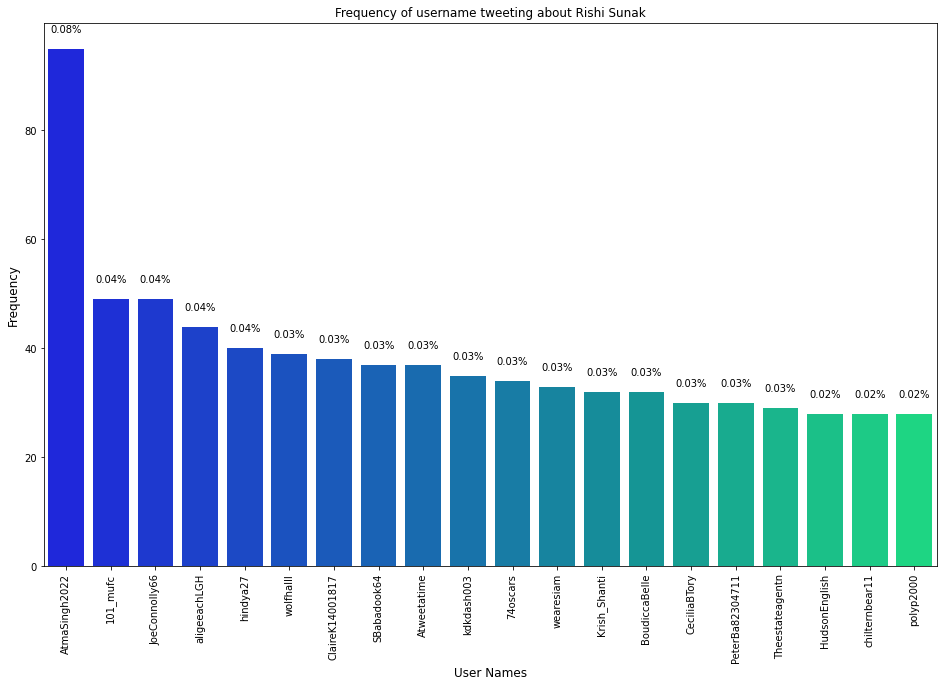

In [93]:
# calling our function
plot_frequency_charts(df, 'username', 'User Names','winter')

In [94]:
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,10))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Rishi Sunak'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

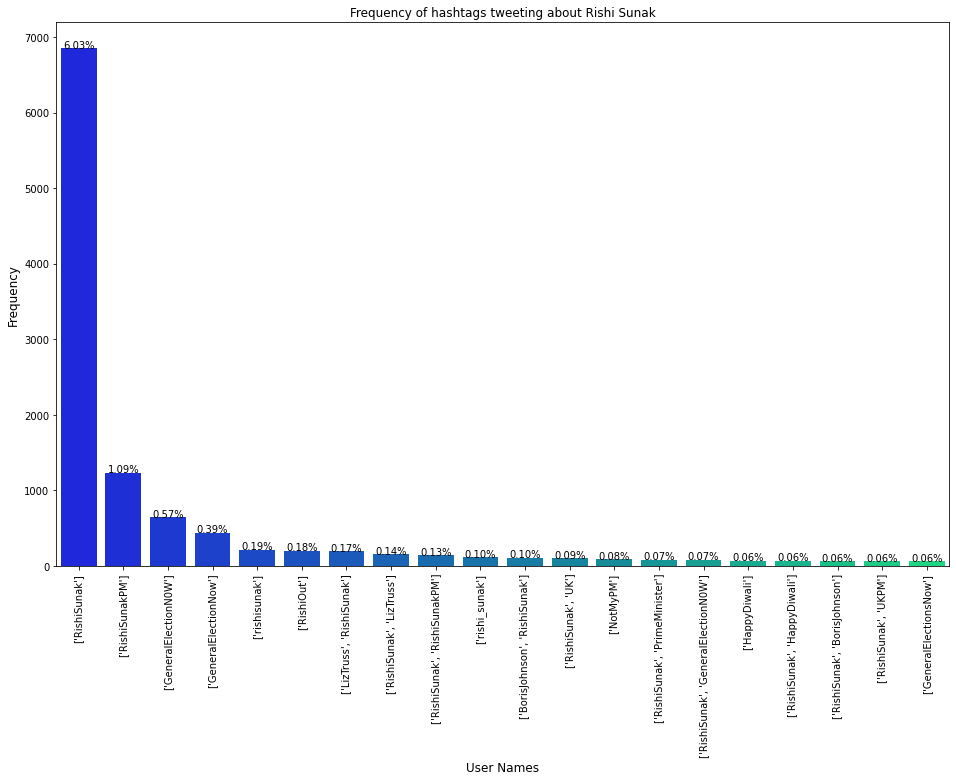

In [95]:
plot_frequency_charts(df, 'hashtags', 'User Names','winter')

### For our sentiment analysis we need two important 'ID' and 'Text' columns

In [96]:
df1 = df[['id','text']]
df1.head(5)

,id,text
0,1584696134693711873,@BritIndianVoice @RishiSunak #RishiSunak is #B...
1,1584696057841098752,#RishiSunak is the richest Tory MP in history....
2,1584695906091536385,#RishiSunak
3,1584695822658441217,A mountain full of money and a knowledge of pr...
4,1584695640696946688,@trussliz @RishiSunak Chance was been given as...


## Preprocessing the dataset

In [97]:
# removes pattern in the text column]
def remove_pattern(input_text,pattern):
    r = re.findall(pattern,input_text)
    for word in r:
       input_text = re.sub(word,'',input_text)
    return input_text   

In [98]:
# remove twitter handles @user
df1['clean_tweet'] = np.vectorize(remove_pattern)(df1['text'], "@[\w]*")
df1['clean_tweet'][0]

'  #RishiSunak is #BritishHindu of paternal #Pakistani Punjabi origin. He’s legally POC (#Pakistan\xa0Origin Card) holder issued by  (probably also concurrently holding India’s OCI through his Indian NRI wife/mother). Also there may be issue with his wife’s Indian citizenship.'

In [99]:
# remove special characters, numbers and punctuations
df1['clean_tweet'] = df1['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df1['clean_tweet'][0]

'  #RishiSunak is #BritishHindu of paternal #Pakistani Punjabi origin  He s legally POC  #Pakistan Origin Card  holder issued by   probably also concurrently holding India s OCI through his Indian NRI wife mother   Also there may be issue with his wife s Indian citizenship '

In [100]:
# remove short words
df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df1['clean_tweet'][0]

'#RishiSunak #BritishHindu paternal #Pakistani Punjabi origin legally #Pakistan Origin Card holder issued probably also concurrently holding India through Indian wife mother Also there issue with wife Indian citizenship'

In [101]:
#removing stop words
import nltk
nltk.download('stopwords')


STOPWORDS = set(stopwords.words('english'))
df1['clean_tweet']= df1['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in STOPWORDS])) # delete stopwords from text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
df1.tail()

,id,text,clean_tweet
113573,1584553348736421888,@JackBarbour_ @piersmorgan @RishiSunak The man...,white pose loyalty white perform huge pressure...
113574,1584553348677525505,@Jacob_Rees_Mogg @RishiSunak Let's hope you're...,hope government post haste posh creep
113575,1584553348597895168,@sajidjavid @RishiSunak Desperate call for a d...,Desperate call decent #ToriesUnfitToGovern
113576,1584553348132397056,@SkyNews Rulling Party needs a strong oppositi...,Rulling Party needs strong opposition every Co...
113577,1584553347998105600,@trussliz @RishiSunak Liz Truss has won the ma...,Truss mandate conservatives membership never I...


In [103]:
# individual words considered as tokens
tokenized_tweet = df1['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [#RishiSunak, #BritishHindu, paternal, #Pakist...
1    [#RishiSunak, richest, Tory, history, wife, bi...
2                                        [#RishiSunak]
3    [mountain, full, money, knowledge, proven, the...
4    [Chance, given, fulfilled, duty, people, late,...
Name: clean_tweet, dtype: object

##Stemming words with NLTK

Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, and “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.

In [104]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [#rishisunak, #britishhindu, patern, #pakistan...
1    [#rishisunak, richest, tori, histori, wife, bi...
2                                        [#rishisunak]
3    [mountain, full, money, knowledg, proven, theo...
4    [chanc, given, fulfil, duti, peopl, late, #ris...
Name: clean_tweet, dtype: object

In [105]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df1['clean_tweet'] = tokenized_tweet
df1.head()

,id,text,clean_tweet
0,1584696134693711873,@BritIndianVoice @RishiSunak #RishiSunak is #B...,#rishisunak #britishhindu patern #pakistani pu...
1,1584696057841098752,#RishiSunak is the richest Tory MP in history....,#rishisunak richest tori histori wife billiona...
2,1584695906091536385,#RishiSunak,#rishisunak
3,1584695822658441217,A mountain full of money and a knowledge of pr...,mountain full money knowledg proven theori har...
4,1584695640696946688,@trussliz @RishiSunak Chance was been given as...,chanc given fulfil duti peopl late #rishisunak...


In [106]:
# checking the first item of our clean tweet
df1['clean_tweet'][0]

'#rishisunak #britishhindu patern #pakistani punjabi origin legal #pakistan origin card holder issu probabl also concurr hold india indian wife mother also issu wife indian citizenship'

In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113578 entries, 0 to 113577
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           113578 non-null  int64 
 1   text         113578 non-null  object
 2   clean_tweet  113578 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


### Tweets with more likes

In [108]:
df[df['likecount'] == df['likecount'].max()]['text'].iloc[0]

"Warmest congratulations @RishiSunak! As you become UK PM, I look forward to working closely together on global issues, and implementing Roadmap 2030. Special Diwali wishes to the 'living bridge' of UK Indians, as we transform our historic ties into a modern partnership."

In [109]:
# most popular tweets
most_pop = df.sort_values('likecount', ascending =False)[['text', 'likecount']].head(12)

most_pop['target1'] = most_pop['likecount']/1000

In [110]:
most_pop

,text,likecount,target1
96134,Warmest congratulations @RishiSunak! As you be...,185559,185.559
100599,I’m gonna end up playing Rishi Sunak aren’t I?,54022,54.022
96502,Rishi Sunak is off to see the King; unclear if...,51371,51.371
9596,I have regenerated!! \nJust be grateful I didn...,39744,39.744
72562,When Rishi Sunak lost UK Prime Ministerial rac...,37183,37.183
77890,"Congratulations, Rishi Sunak! Prime Minister ...",36430,36.430
97673,"A brief Googling suggests Rishi Sunak, Emmanue...",29094,29.094
37012,Rishi Sunak's grandparents were from Gujranwal...,25388,25.388
9231,We will face the tough challenges ahead togeth...,21790,21.790
87674,Sanghis are proud of Rishi Sunak being the PM ...,19618,19.618


## Finding all hashtags in our cleaned tweets

In [111]:
# function to print all the hashtags in a text
def extract_hashtags(text):
     
    # initializing hashtag_list variable
    hashtag_list = []
     
    # splitting the text into words
    for i in range(0,len(text)):
        for word in text[i].split():
         
        # checking the first character of every word
           if word[0] == '#':
             
            # adding the word to the hashtag_list
              hashtag_list.append(word[1:])

    return hashtag_list        

In [112]:
## List of all hashtags in our clean_tweet
all_hashtags = extract_hashtags(df1['clean_tweet'])


In [113]:
## length of hashtag list
print(len(all_hashtags))

55051


In [114]:
# uninques hashtags in our list
unique_hashtags = list(set(all_hashtags))
print(unique_hashtags)

['mbfansundervijayfansfoot', 'bangalor', 'deathshot', 'gtto', 'eldorado', 'leicesterhindusattack', 'corpor', 'austingp', 'vichar', 'devcommun', 'guadalajara', 'stabilityuk', 'malaysia', 'loancharg', 'charlesiii', 'suela', 'rishisuwil', 'saturday', 'britcoin', 'rainonrishisparad', 'nevermesswithanindian', 'trickledowntruss', 'selfemploy', 'deniedfurlough', 'leadershiprac', 'hindusconquerpeac', 'macaulay', 'pmwhoswho', 'pathologicalliar', 'willofthepeopl', 'dontletusdown', 'cop', 'toryshambl', 'brendanclarksmith', 'theukroyalfamili', 'scummedia', 'richachadha', 'antisemit', 'michaelcarrick', 'conservativeleadershiprac', 'akshatamurthi', 'partyoftherich', 'titan', 'mordaunt', 'rishikesh', 'wakkerworden', 'patrickharvi', 'indiainblood', 'indianancestri', 'trendingnow', 'prideindian', 'gaumata', 'jamescallaghan', 'tularashi', 'grahambradi', 'herewegoagain', 'sunaknotmypm', 'reformuk', 'slijmbal', 'fabric', 'countryfirst', 'selfservativesout', 'zelinski', 'poeticjustic', 'selfpreservationtor

In [115]:
from collections import Counter
import operator
 
# declaring the list
l = all_hashtags
 
# driver program
x = unique_hashtags
d = Counter(l)
sorted_d = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))
print(sorted_d)

{'rishisunak': 17530, 'rishisunakpm': 2835, 'liztruss': 1596, 'generalelectionn': 1357, 'generalelectionnow': 1094, 'borisjohnson': 1045, 'primeminist': 758, 'rishi': 719, 'happydiwali': 592, 'generalelect': 562, 'rishiout': 493, 'diwali': 488, 'tori': 464, 'conserv': 449, 'ukpm': 405, 'liztrusspm': 388, 'india': 386, 'sunak': 386, 'britain': 382, 'conservativeparti': 337, 'unitedkingdom': 273, 'notmypm': 270, 'toryleadershipfarc': 270, 'toryleadershipcontest': 265, 'pennymordaunt': 263, 'torychao': 240, 'bori': 236, 'ukpolit': 233, 'indian': 229, 'ukprimeminist': 226, 'brexit': 210, 'readi': 195, 'toriesout': 181, 'britishpm': 179, 'british': 175, 'britainpm': 171, 'toryshambl': 169, 'generalelectionsnow': 159, 'toriesoutnow': 153, 'liztrussresign': 150, 'wef': 139, 'wefpuppet': 139, 'truss': 138, 'sunakout': 128, 'england': 118, 'britishpolit': 118, 'polit': 117, 'conservativeleadershipcontest': 115, 'neverrishisunak': 114, 'borisorbust': 109, 'toriesdestroyingourcountri': 103, 'labo

In [116]:
import itertools

top_10_hashtags = dict(itertools.islice(sorted_d.items(), 10))
d = pd.DataFrame({'Hashtag': list(top_10_hashtags.keys()),
                 'Count': list(top_10_hashtags.values())})
d.head() 

,Hashtag,Count
0,rishisunak,17530
1,rishisunakpm,2835
2,liztruss,1596
3,generalelectionn,1357
4,generalelectionnow,1094


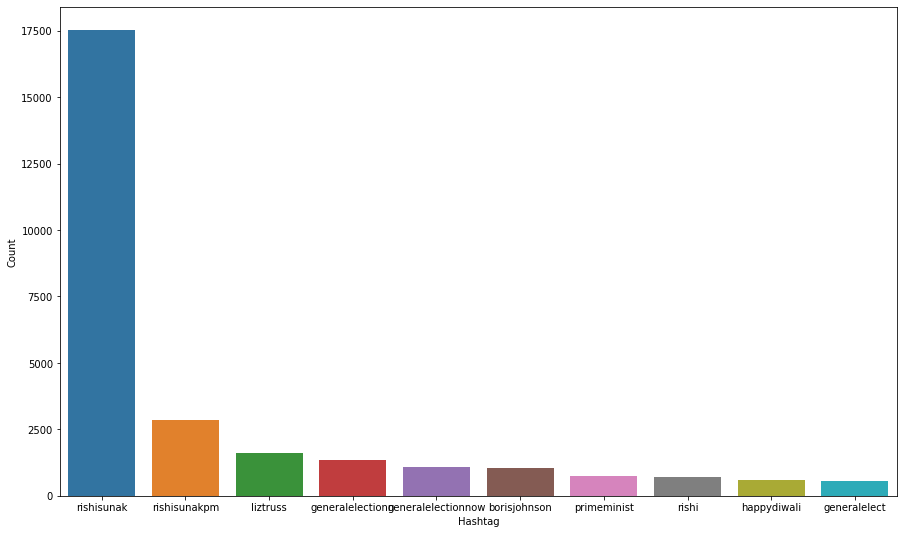

In [117]:
# select top 10 hashtags
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

## Sentiment scoring using VADER

VADER(Valence Aware Dictionary and sEntiment Reasonar) Bag of Words approach

This approach essentially takes all words in a sentence and it has a value of either positive/neagetive/neutral for each of those words and it just does a math equation for all the words and add up to tell us how positive,negative or neutral the statements is based on all those words

Note: this approach doen not account for relationship between the words ,which is pretty important for human speech but at least its a good start.

we will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.
* This uses a Bag of word approach:
  1. Stopwords are removed.
  2. each word is scored and combined to a total score.

  


In [118]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [119]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm # progress bar tracker

sia = SentimentIntensityAnalyzer()

In [120]:
# an example on some random sentence
sia.polarity_scores("I am so happy,i will hit someone very hard")

{'neg': 0.195, 'neu': 0.805, 'pos': 0.0, 'compound': -0.1761}

In [121]:
sia.polarity_scores("today is my lucky day,i will get some rewards")

{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.7096}

## Running the polarity scores on the entire dataframe df1.

In [122]:
sia.polarity_scores(df1['clean_tweet'][0])

{'neg': 0.0, 'neu': 0.941, 'pos': 0.059, 'compound': 0.128}

In [123]:
polarity_scores = []
for sentence in df1['clean_tweet']:
    polarity_scores.append(sia.polarity_scores(sentence))

id = list(df1['id'])

# making a dictionary which will store the polarity scores of each sentence with id as key
res = dict(zip(id,polarity_scores))

In [124]:
# lets store the output in a dataframe 
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns ={'index':'id'})
# merging vaders datframe with our original dataframe
vaders = df1.merge(vaders,how = 'left')

In [125]:
# now we have sentiment score and metadata
vaders.head(10)

,id,text,clean_tweet,neg,neu,pos,compound
0,1584696134693711873,@BritIndianVoice @RishiSunak #RishiSunak is #B...,#rishisunak #britishhindu patern #pakistani pu...,0.000,0.941,0.059,0.1280
1,1584696057841098752,#RishiSunak is the richest Tory MP in history....,#rishisunak richest tori histori wife billiona...,0.000,0.764,0.236,0.5267
2,1584695906091536385,#RishiSunak,#rishisunak,0.000,1.000,0.000,0.0000
3,1584695822658441217,A mountain full of money and a knowledge of pr...,mountain full money knowledg proven theori har...,0.080,0.682,0.239,0.5859
4,1584695640696946688,@trussliz @RishiSunak Chance was been given as...,chanc given fulfil duti peopl late #rishisunak...,0.000,0.585,0.415,0.7964
5,1584695280238465025,@RishiSunak has added a new meaning to the who...,ad mean whole pipelin thing #rishisunak,0.000,1.000,0.000,0.0000
6,1584694868646821888,Why are we remembering #WinstonChurchill when ...,rememb #winstonchurchil #rishisunak go britain...,0.281,0.719,0.000,-0.5994
7,1584694808794497026,I see a lot of white ass is getting burnt... \...,white get burnt #rishisunak,0.000,1.000,0.000,0.0000
8,1584694622538076164,Now when hearing the name of UK feels like Uni...,hear name feel like unit kailasa #rishisunak #...,0.000,0.800,0.200,0.3612
9,1584694437695090689,Time Wheel - Now It's an Indian to Look after ...,time wheel indian look british #rishisunakpm #...,0.000,1.000,0.000,0.0000


In [126]:
#length of our vaders dataframe
print(len(vaders))

113578


## Count of positive,negative and neutral tweets in our vaders dataframe

In [127]:
print(f'Number of neutral tweets:',len(vaders[vaders['compound']==0]))
print(f'Number of positive tweets:',len(vaders[vaders['compound']>=0])),
print(f'Number of negative tweets:',len(vaders[vaders['compound']<=0]))

Number of neutral tweets: 56009
Number of positive tweets: 92679
Number of negative tweets: 76908


## lets make separate dataframes for each positive,negative, neutral and then we will see frequency of words in each dataframe using word cloud

In [128]:
# positive dataframe
pos_df= vaders[vaders['compound']>=0]
#negative dataframe
neg_df= vaders[vaders['compound']<=0]
#neutral dataframe
neu_df= vaders[vaders['compound']==0]

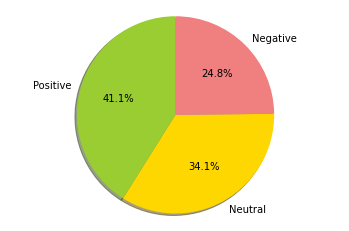

In [129]:
# A pie chart showing the number of tweets in each sentiment category
pos = len(pos_df)
neu = len(neg_df)
neg = len(neu_df)
labels = 'Positive', 'Neutral', 'Negative'
sizes = [pos, neu, neg]
colors = ['yellowgreen', 'gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [130]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


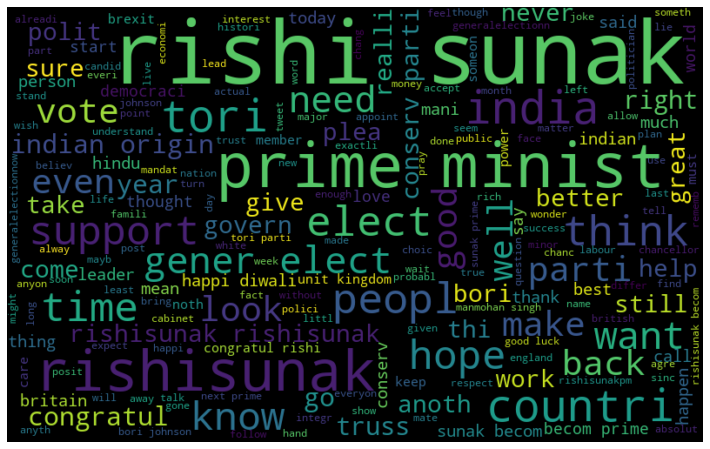

In [131]:
# visualize the frequent words in positve tweets
all_words = " ".join([sentence for sentence in pos_df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

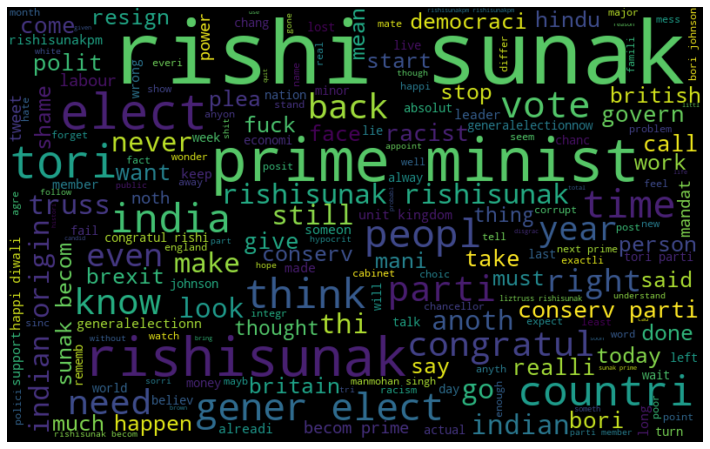

In [132]:
# visualize the frequent words in negative tweets
all_words = " ".join([sentence for sentence in neg_df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

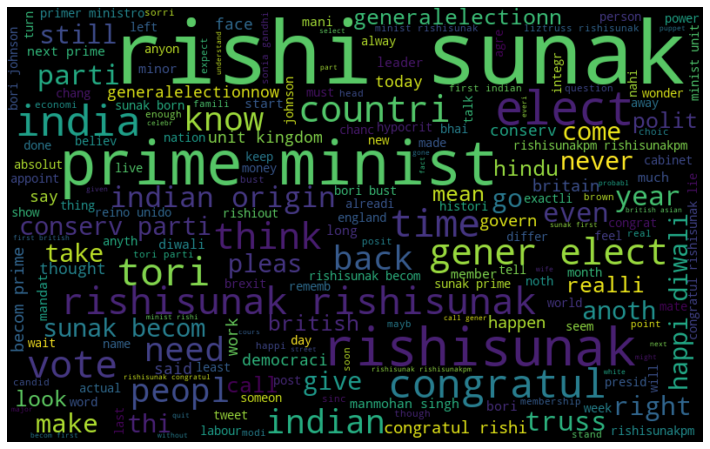

In [133]:
# visualize the frequent words in negative tweets
all_words = " ".join([sentence for sentence in neu_df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Sentiment analysis with TEXTBLOB

TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

In [134]:
!pip install -U textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [135]:
from textblob import TextBlob

### some examples to check sentiments with texblob


In [136]:
# Positive sentence
text1 = 'Food at restraurent was very good'
blob1 = TextBlob(text1)
blob1.sentiment

Sentiment(polarity=0.9099999999999999, subjectivity=0.7800000000000001)

In [137]:
# Negative sentence
text2 = 'Food at restraurent was not very good'
blob2 = TextBlob(text2)
blob2.sentiment

Sentiment(polarity=-0.26923076923076916, subjectivity=0.46153846153846156)

In [138]:
# neutral sentence
text3 = 'Earth revolves around the sun'
blob3 = TextBlob(text3)
blob3.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

Polarity tell us how much positive or negative the comment is.

value of polarity is range of -1 to +1 (-ve value indicates sentiment is not good,
+ve value indicates sentiment is good)

value of subjectivity relates to whether it is a public opinion or its a factual information(range is 0 to 1)

In [142]:
df1.head()

,id,text,clean_tweet
0,1584696134693711873,@BritIndianVoice @RishiSunak #RishiSunak is #B...,#rishisunak #britishhindu patern #pakistani pu...
1,1584696057841098752,#RishiSunak is the richest Tory MP in history....,#rishisunak richest tori histori wife billiona...
2,1584695906091536385,#RishiSunak,#rishisunak
3,1584695822658441217,A mountain full of money and a knowledge of pr...,mountain full money knowledg proven theori har...
4,1584695640696946688,@trussliz @RishiSunak Chance was been given as...,chanc given fulfil duti peopl late #rishisunak...


In [148]:
a = TextBlob(df1.iloc[0][2])
a.sentiment

Sentiment(polarity=0.2, subjectivity=0.2)

In [154]:
polarityscore = []
for i in range(0,len(df1)):
    score = TextBlob(df1.iloc[i][2])
    score1 = score.sentiment[0]
    polarityscore.append(score1)

In [156]:
# adding polarity scores to our df1 and storing it as df2
df2 = pd.concat([df1,pd.Series(polarityscore)],axis = 1)

In [159]:
# checking first 5 rows
df2.rename(columns = {df2.columns[3]:"Sentiment"},inplace=True)
df2.head()

,id,text,clean_tweet,Sentiment
0,1584696134693711873,@BritIndianVoice @RishiSunak #RishiSunak is #B...,#rishisunak #britishhindu patern #pakistani pu...,0.200000
1,1584696057841098752,#RishiSunak is the richest Tory MP in history....,#rishisunak richest tori histori wife billiona...,0.200000
2,1584695906091536385,#RishiSunak,#rishisunak,0.000000
3,1584695822658441217,A mountain full of money and a knowledge of pr...,mountain full money knowledg proven theori har...,0.352778
4,1584695640696946688,@trussliz @RishiSunak Chance was been given as...,chanc given fulfil duti peopl late #rishisunak...,0.350000


In [160]:
print(f'Number of neutral tweets:',len(df2[df2['Sentiment']==0]))
print(f'Number of positive tweets:',len(df2[df2['Sentiment']>=0])),
print(f'Number of negative tweets:',len(df2[df2['Sentiment']<=0]))

Number of neutral tweets: 65893
Number of positive tweets: 99591
Number of negative tweets: 79880


Number of neutral tweets: 56009
Number of positive tweets: 92679
Number of negative tweets: 76908

### pie chart to show percenatge of positve ,neagtive and neutral tweets

In [162]:
# positive dataframe
pos_df1= df2[df2['Sentiment']>=0]
#negative dataframe
neg_df1= df2[df2['Sentiment']<=0]
#neutral dataframe
neu_df1= df2[df2['Sentiment']==0]

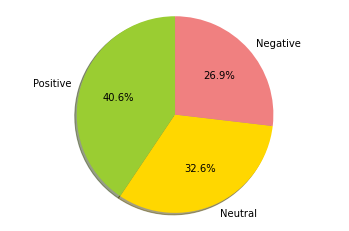

In [163]:
# A pie chart showing the number of tweets in each sentiment category
pos = len(pos_df1)
neu = len(neg_df1)
neg = len(neu_df1)
labels = 'Positive', 'Neutral', 'Negative'
sizes = [pos, neu, neg]
colors = ['yellowgreen', 'gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

# CONCLUSION:

Our both models performed well in creating sentiments for our tweets in our dataframe . As it was analysis of tweets for Rishi Sunak as prime minister ,so most of words in our wordcloud in categories positive ,negative and neutral belong to them only such as PRIME MINISTER, RISHI SUNAK , INDIA ,TIME etc
with the help of these sentiment we can also create labels for most tweets who appeared common in both vaders and TextBlob models and save it as a csv file for further analysis in future 